In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("game_data_final.csv")

In [3]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,c2'a1Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


**Top 3 Genre and Top 3 Publisher and Top 3 Platform**

In [4]:
top3_publishers = data["Publisher"].value_counts().index[:3]
top3_genres = data["Genre"].value_counts().index[:3]
top3_platforms = data["Platform"].value_counts().index[:3]

In [5]:
top3_publishers

Index(['Electronic Arts', 'Activision', 'Namco Bandai Games'], dtype='object')

In [6]:
top3_data = data.loc[
    (data["Publisher"].isin(top3_publishers))
    & (data["Genre"].isin(top3_genres))
    & (data["Platform"].isin(top3_platforms))
]

In [7]:
top3_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257
...,...,...,...,...,...,...,...,...,...,...,...
16438,14938,Yes! Precure 5 Go Go Zenin Shu Go! Dream Festival,DS,2008.0,Action,Namco Bandai Games,1.087977,0.592445,1.087977,0.394830,3.509168
16479,10979,Young Justice: Legacy,PS3,2013.0,Action,Namco Bandai Games,2.186589,1.087977,3.409089,0.394830,7.359902
16601,11802,ZhuZhu Pets: Quest for Zhu,DS,2011.0,Misc,Activision,2.340740,1.525543,3.103825,0.394830,7.372592
16636,9196,Zoobles! Spring to Life!,DS,2011.0,Misc,Activision,2.697415,1.087977,2.760718,0.394830,6.915540


<hr style="border: 1px solid gray;">

## <code style="background:yellow;color:black">1. Multivariate Analysis</code>

Multivariate analysis involves the examination of more than two variables to understand the relationships among them. It aims to analyze data sets that have more than one dependent variable and to understand how these variables interact with one another. This type of analysis is essential in fields where complex relationships exist, such as in social sciences, medicine, and market research.

**Types of Multivariate Analysis**
* **Multiple Regression:** Examines the relationship between one dependent variable and two or more independent variables.
* **Multivariate Analysis of Variance (MANOVA):** Extends ANOVA by comparing multivariate means of groups.
* **Principal Component Analysis (PCA):** Reduces the dimensionality of a data set while preserving as much variability as possible.
* **Factor Analysis:** Identifies underlying factors that explain the patterns of correlations within a set of observed variables.
* **Cluster Analysis:** Groups a set of objects in such a way that objects in the same group (cluster) are more similar to each other than to those in other groups.
* **Discriminant Analysis:** Determines which variables discriminate between two or more naturally occurring groups.

**Benefits of Multivariate Analysis**
* **Comprehensive Understanding:** Allows for a more comprehensive understanding of complex data sets with multiple variables.
* **Control for Confounding Variables:** Helps control for the effect of confounding variables and identifies the unique contribution of each variable

#### 1. NNC -> Numerical, Numerical, Categorical

Scatterplot between two numerical columns which has color to show the categorical column

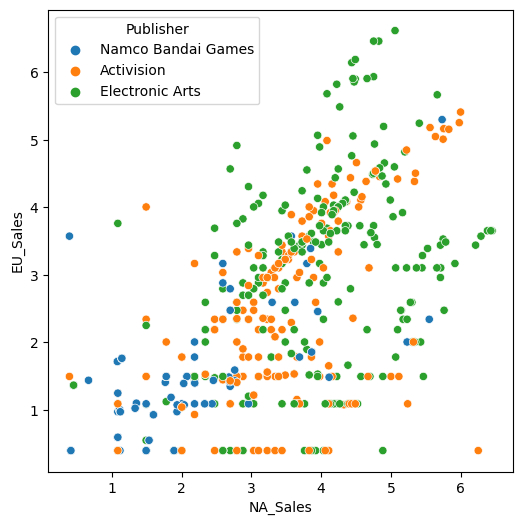

In [8]:
plt.figure(figsize = (6, 6))
sns.scatterplot(
    x = "NA_Sales",
    y = "EU_Sales",
    hue = "Publisher",
    data = top3_data
)
plt.show()

#### 2. CCN -> Categorical, Categorical, Numerical

Boxplot between a categorical and numerical column with the other categorical column as hue

<Axes: xlabel='Publisher', ylabel='Global_Sales'>

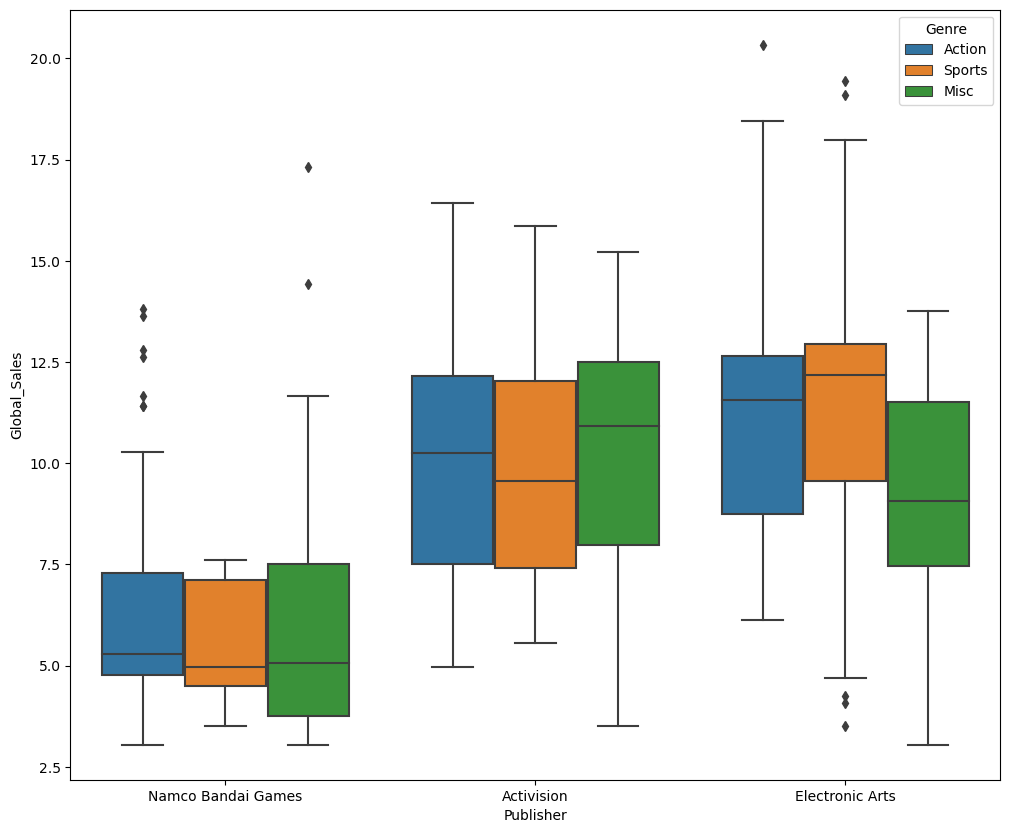

In [9]:
plt.figure(figsize = (12, 10))
sns.boxplot(
    x = "Publisher",
    y = "Global_Sales",
    hue = "Genre",
    data = top3_data
)

#### 3. NNN -> Numerical, Numerical, Numerical

Scatterplot between two numerical columns with the third governing the size

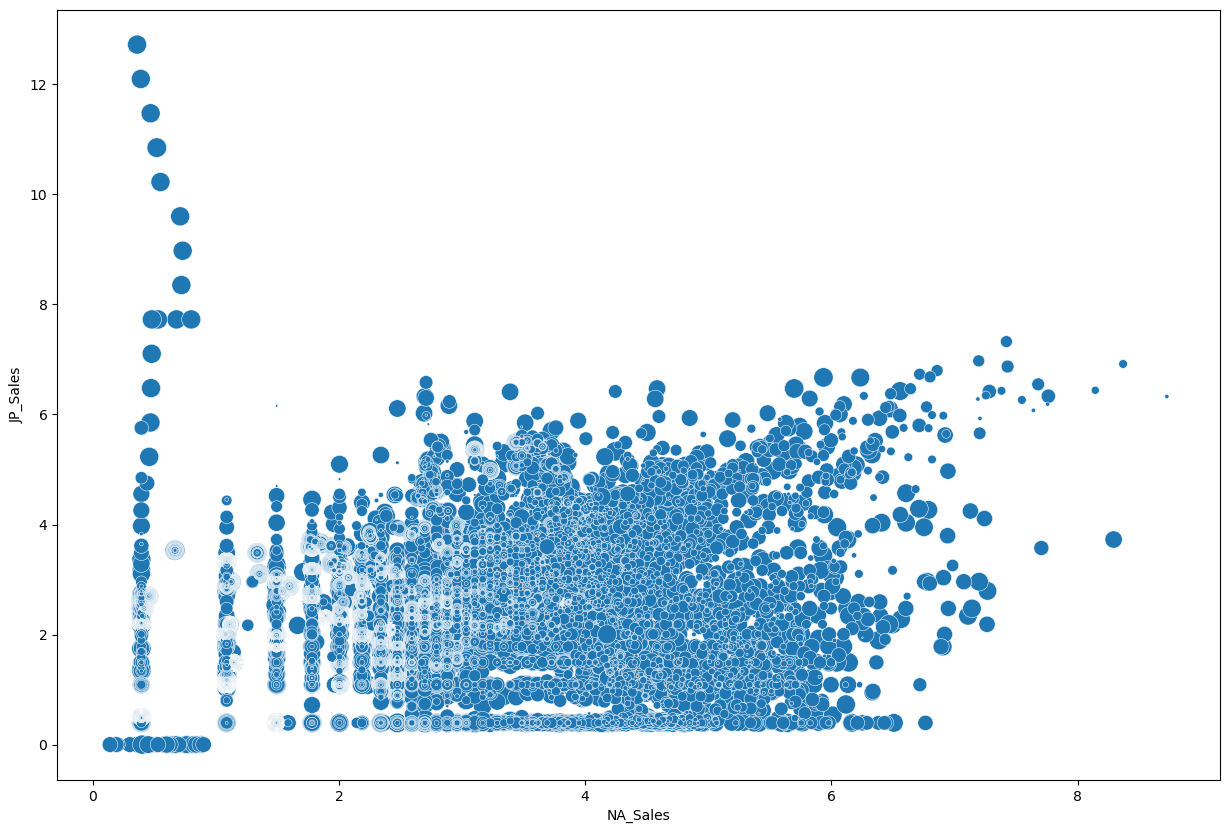

In [10]:
plt.figure(figsize = (15, 10))
sns.scatterplot(
    x = "NA_Sales",
    y = "JP_Sales",
    size = "Rank",
    sizes = (1, 200),
    data = data
)
plt.legend('', frameon = False)

<Figure size 500x500 with 0 Axes>

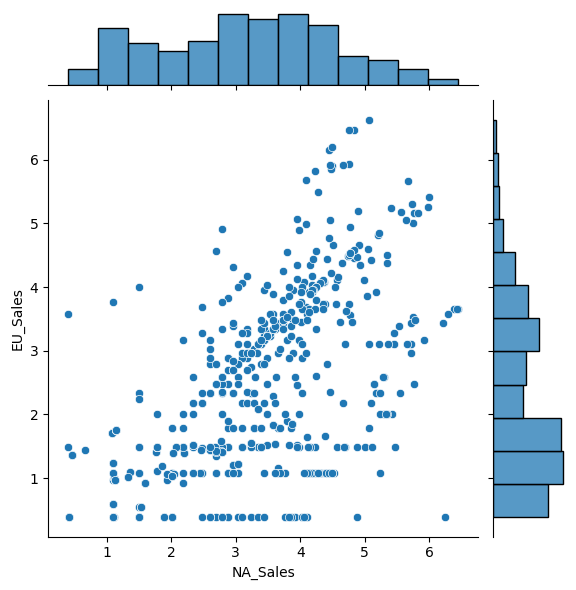

In [11]:
plt.figure(figsize = (5, 5))
sns.jointplot(
    x = "NA_Sales",
    y = "EU_Sales",
    data = top3_data
)
plt.show()

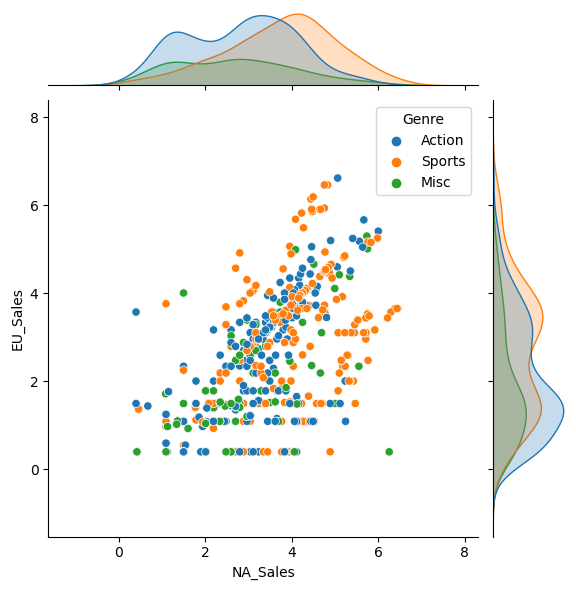

In [12]:
sns.jointplot(
    x = "NA_Sales",
    y = "EU_Sales",
    hue = "Genre",
    data = top3_data
)

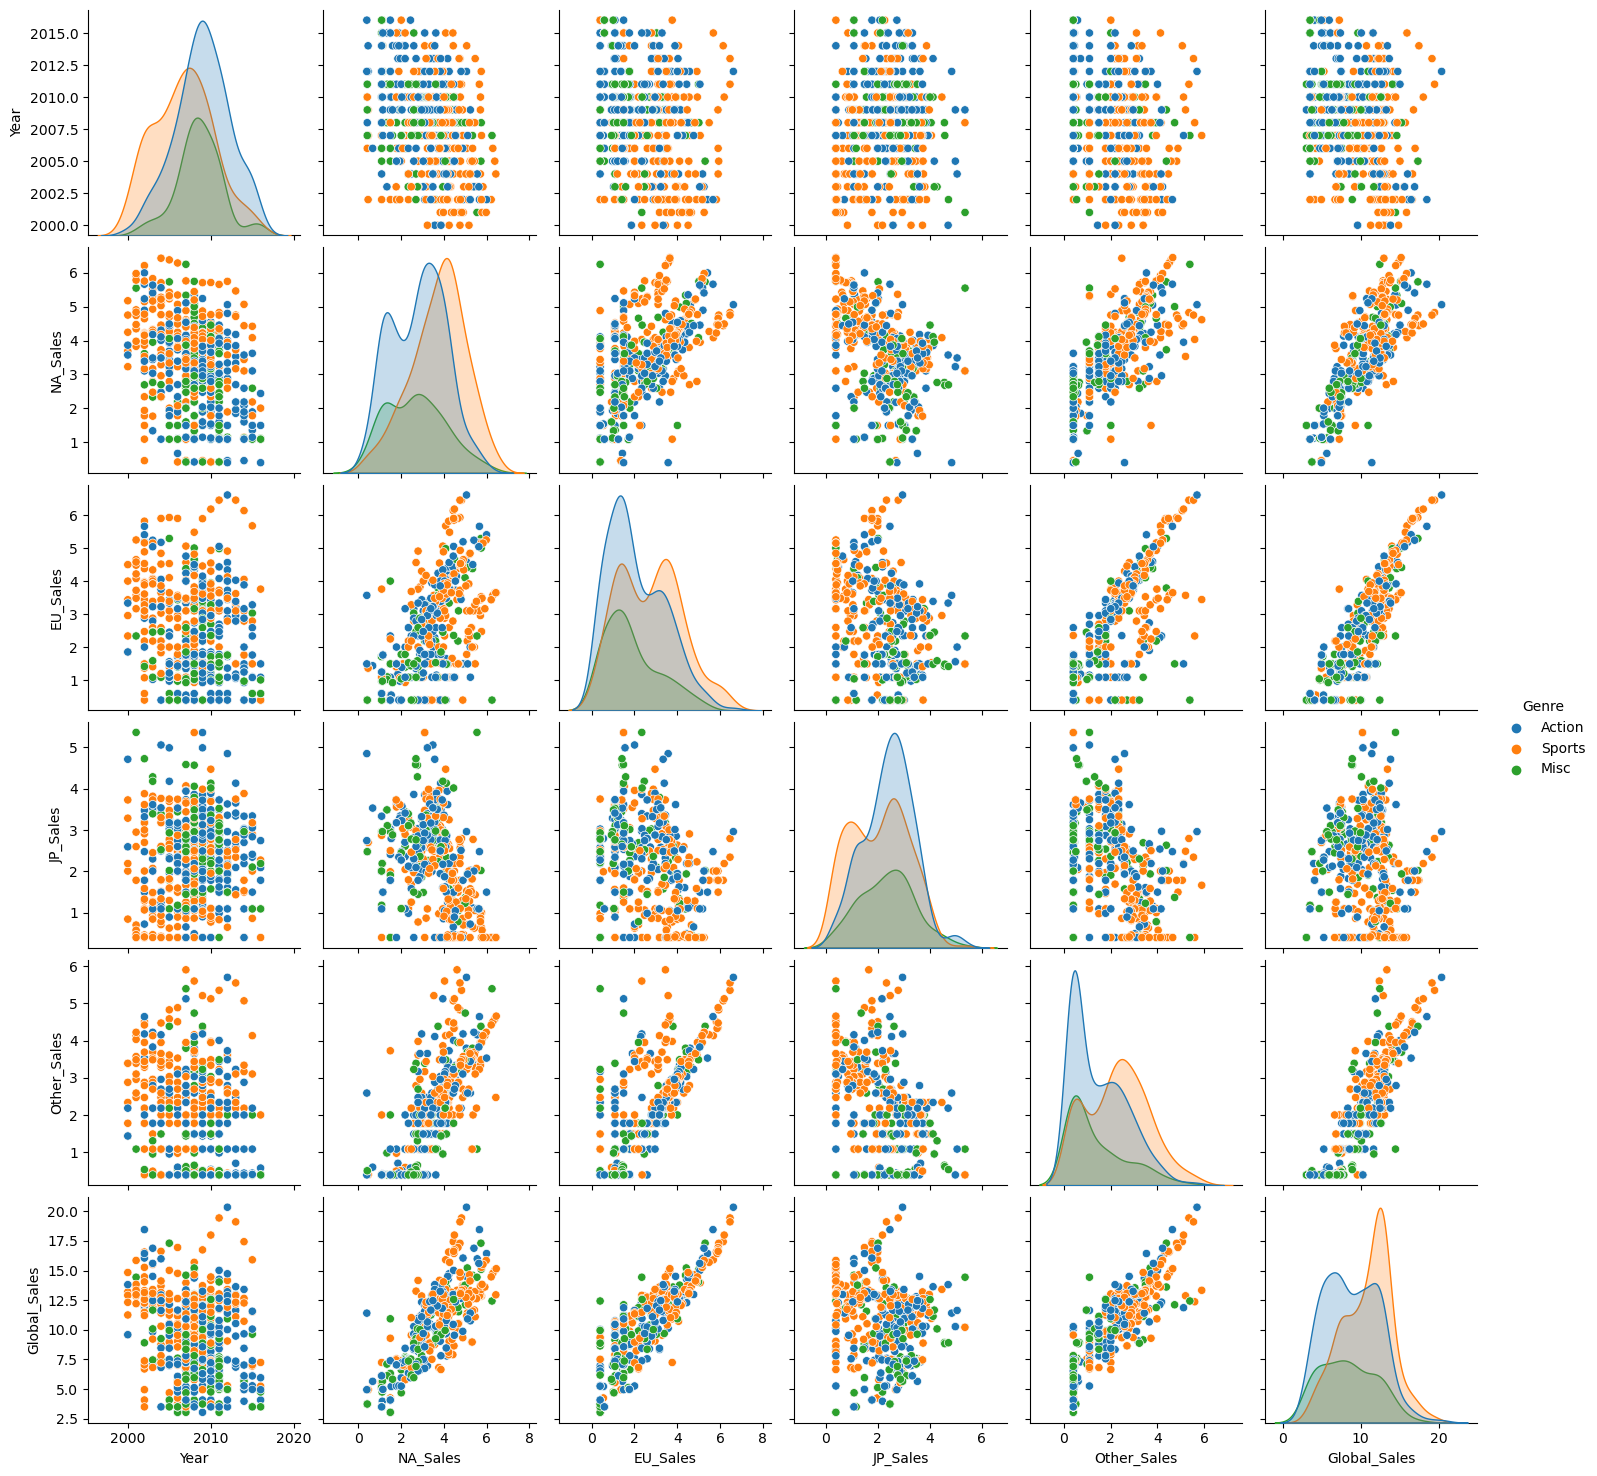

In [13]:
sns.pairplot(data = top3_data, 
             hue = "Genre")

In [14]:
top3_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257
...,...,...,...,...,...,...,...,...,...,...,...
16438,14938,Yes! Precure 5 Go Go Zenin Shu Go! Dream Festival,DS,2008.0,Action,Namco Bandai Games,1.087977,0.592445,1.087977,0.394830,3.509168
16479,10979,Young Justice: Legacy,PS3,2013.0,Action,Namco Bandai Games,2.186589,1.087977,3.409089,0.394830,7.359902
16601,11802,ZhuZhu Pets: Quest for Zhu,DS,2011.0,Misc,Activision,2.340740,1.525543,3.103825,0.394830,7.372592
16636,9196,Zoobles! Spring to Life!,DS,2011.0,Misc,Activision,2.697415,1.087977,2.760718,0.394830,6.915540


In [15]:
top3_data.corr() # Gives you a matrix of correlation between all columns

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7132\2185933959.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top3_data.corr() # Gives you a matrix of correlation between all columns


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.354256,-0.178026,0.055864,-0.239876,-0.280351
NA_Sales,-0.354256,1.000000,0.617483,-0.233315,0.794353,0.856300
EU_Sales,-0.178026,0.617483,1.000000,-0.208249,0.771105,0.864147
JP_Sales,0.055864,-0.233315,-0.208249,1.000000,-0.355825,-0.014193
Other_Sales,-0.239876,0.794353,0.771105,-0.355825,1.000000,0.878816
Global_Sales,-0.280351,0.856300,0.864147,-0.014193,0.878816,1.000000


In [16]:
numerical_data = top3_data[["Rank", "Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]

In [17]:
numerical_data.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7132\3479258442.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  numerical_data.corr()


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.354256,-0.178026,0.055864,-0.239876,-0.280351
NA_Sales,-0.354256,1.000000,0.617483,-0.233315,0.794353,0.856300
EU_Sales,-0.178026,0.617483,1.000000,-0.208249,0.771105,0.864147
JP_Sales,0.055864,-0.233315,-0.208249,1.000000,-0.355825,-0.014193
Other_Sales,-0.239876,0.794353,0.771105,-0.355825,1.000000,0.878816
Global_Sales,-0.280351,0.856300,0.864147,-0.014193,0.878816,1.000000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7132\2732631054.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  numerical_data.corr(),


<Axes: >

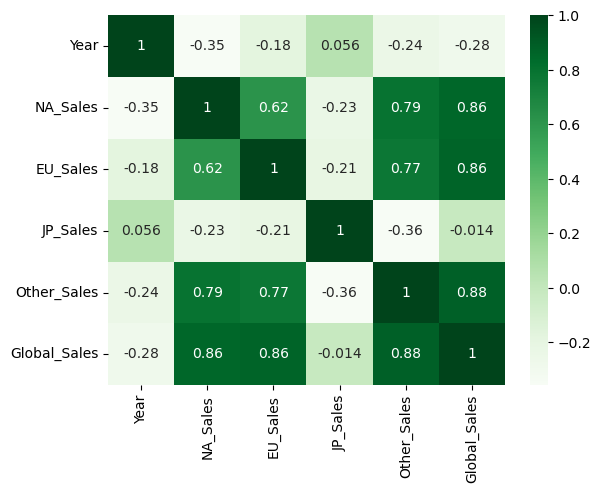

In [18]:
sns.heatmap(
    numerical_data.corr(),
    cmap = "Greens",
    annot = True
)

#### plt.colormaps()

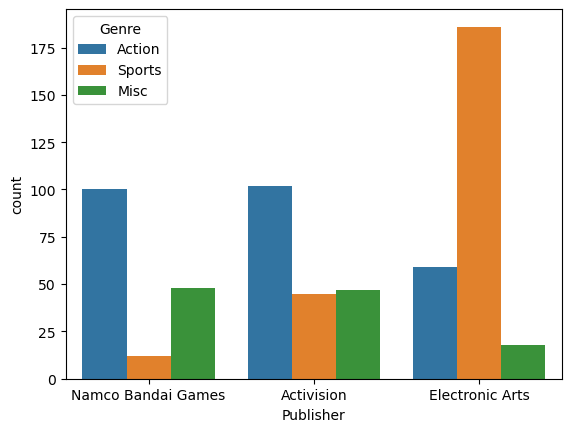

In [19]:
sns.countplot(x = "Publisher", hue = "Genre", data = top3_data)
plt.show()

In [20]:
top3_data.loc[top3_data["Genre"] == "Action"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257
...,...,...,...,...,...,...,...,...,...,...,...
16354,4711,X-Men: The Official Game,PS2,2006.0,Action,Activision,3.390562,3.167419,3.166967,2.004268,11.664077
16357,10403,X-Men: The Official Game,DS,2006.0,Action,Activision,2.697415,1.428818,2.599771,0.394830,7.098241
16437,13483,Yes! PreCure 5,DS,2007.0,Action,Namco Bandai Games,1.493442,0.394830,1.781124,0.394830,4.085704
16438,14938,Yes! Precure 5 Go Go Zenin Shu Go! Dream Festival,DS,2008.0,Action,Namco Bandai Games,1.087977,0.592445,1.087977,0.394830,3.509168


In [21]:
top3_data["Publisher"].value_counts()

Electronic Arts       263
Activision            194
Namco Bandai Games    160
Name: Publisher, dtype: int64

In [22]:
action_data = top3_data.loc[top3_data["Genre"] == "Action"]

In [23]:
action_data_values = action_data["Publisher"].value_counts()

In [24]:
action_data_values

Activision            102
Namco Bandai Games    100
Electronic Arts        59
Name: Publisher, dtype: int64

<BarContainer object of 3 artists>

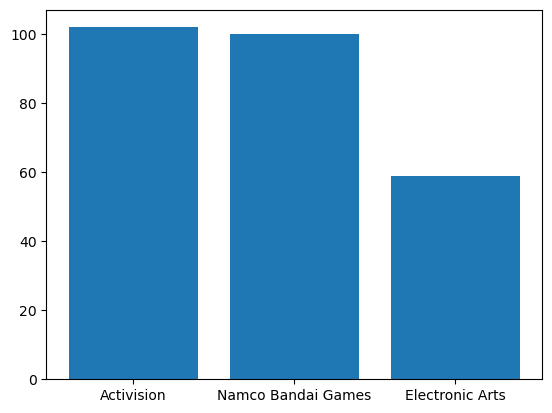

In [25]:
plt.bar(action_data_values.index, action_data_values)

In [26]:
sports_data = top3_data.loc[top3_data["Genre"] == "Sports"]
sports_data_values = sports_data["Publisher"].value_counts()

<BarContainer object of 3 artists>

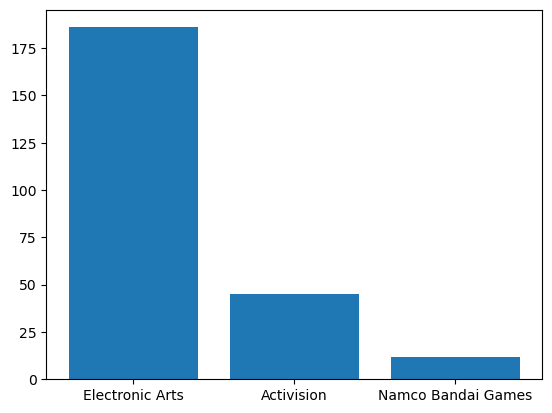

In [27]:
plt.bar(sports_data_values.index, sports_data_values)

<BarContainer object of 3 artists>

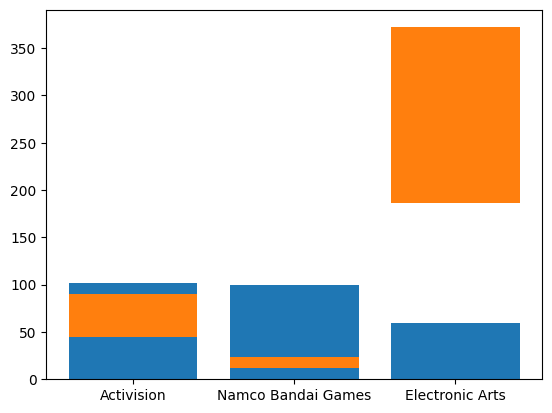

In [69]:
plt.bar(action_data_values.index, action_data_values)
plt.bar(sports_data_values.index, sports_data_values, bottom = sports_data_values)